In [70]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PIL
import os
from sys import platform
from importlib import reload
import plotly.graph_objects as go

# Local imports
import sys
sys.path.append('../../../')
import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import fourierstuff as fs

In [71]:
%matplotlib notebook

In [72]:
# Have to do this in case of different operating systems
if platform == "linux" or platform == "darwin":
    slash = '/'
else: # This is assumed to be Windows
    slash = '\\'
#print(slash)

In [73]:
# Graphics parameters
fontsize = 10
linewidth = 2
matplotlib.rcParams.update({'font.size': fontsize})

In [74]:
# Specify the file we want to analyze (and output file name)
pwd = os.getcwd(); startpos = len(pwd)-pwd[::-1].find(slash)
case = pwd[startpos:]; print(case)
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)
Segmentroot='Segments3'; print(Segmentroot)

case4.0 (calibration)
2023-07-03/case4.0 (calibration)
Segments3


In [75]:
# Derivative names
Compressedfilename = Segmentroot+'_retrieved.npz'; print (Compressedfilename)
Originalfilename = Segmentroot+'_compr.npz'; print(Originalfilename)
Flattenedfilename = Segmentroot+'_compr_flat.npz'; print(Flattenedfilename)
Filteredfilename = Segmentroot+'_compr_flat_filt.npz'; print(Filteredfilename)

Segments3_retrieved.npz
Segments3_compr.npz
Segments3_compr_flat.npz
Segments3_compr_flat_filt.npz


In [76]:
# Get the retrieved surface
npzfile = np.load(Compressedfilename)
imageroot = np.array_str(npzfile['imageroot'])
dx,dy,cA,cB,cC,cD,Filename = ims.getc2('', 'SEMimages/', imageroot, 'C')
print("dx and dy", dx, dy)

SEMimages/case4.0-A.bmp
SEMimages/case4.0-B.bmp
SEMimages/case4.0-C.bmp
SEMimages/case4.0-D.bmp
dx and dy 0.9921875 0.9921875


In [77]:
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']
solution = npzfile['solution']
nsegments = len(nx1list)

In [78]:
# Graph the segments
im = PIL.Image.open(Filename)
ny_im,nx_im = np.shape(im)
draw = PIL.ImageDraw.Draw(im)
for i in range(nsegments):
    nx1 = nx1list[i]
    nx2 = nx2list[i]
    ny1 = ny1list[i]
    ny2 = ny2list[i]
    ims.myrectangle(draw,(nx1,ny1),(nx2,ny2),2)
plt.imshow(np.asarray(im),cmap = 'Greys_r', vmin = 0,vmax = 255)
plt.title(case_and_folder)

Text(0.5, 1.0, '2023-07-03/case4.0 (calibration)')

In [79]:
# Flatten them
xseggrid, yseggrid, zseggrid, surf_xseggrid, surf_yseggrid, surf_zseggrid = ims.extractflat(npzfile,dx,dy)

In [80]:
# Report
print(np.shape(zseggrid[0]), \
      xseggrid[0][0,1]-xseggrid[0][0,0],yseggrid[0][1,0]-yseggrid[0][0,0])
print(np.shape(surf_zseggrid[0]), \
      surf_xseggrid[0][0,1]-surf_xseggrid[0][0,0],surf_yseggrid[0][1,0]-surf_yseggrid[0][0,0])

(43, 43) 0.9921875 0.9921875
(47, 47) 0.9921875 0.9921875


Working on segment  0
(43, 43)


<IPython.core.display.Javascript object>


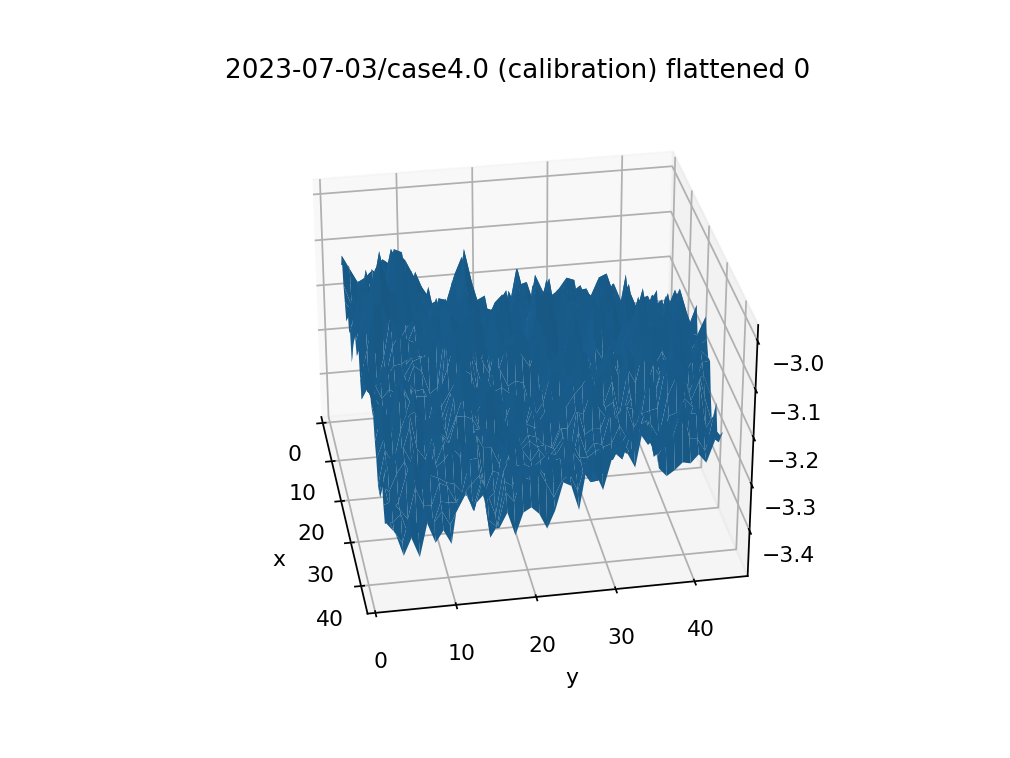

<IPython.core.display.Javascript object>


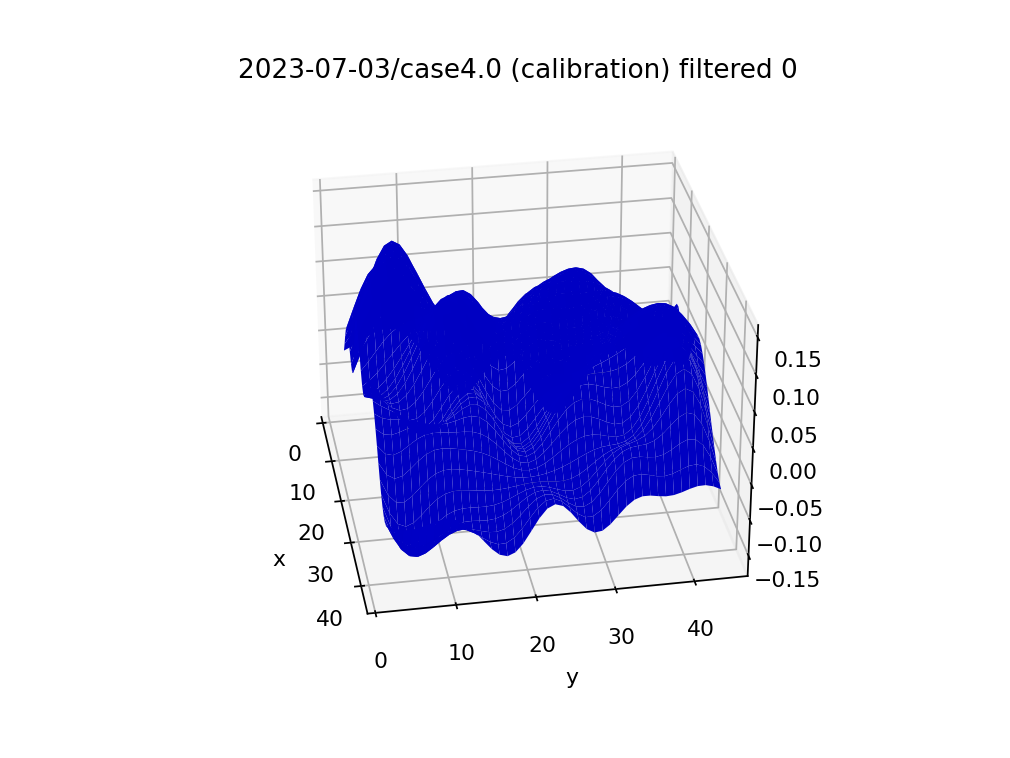

<IPython.core.display.Javascript object>


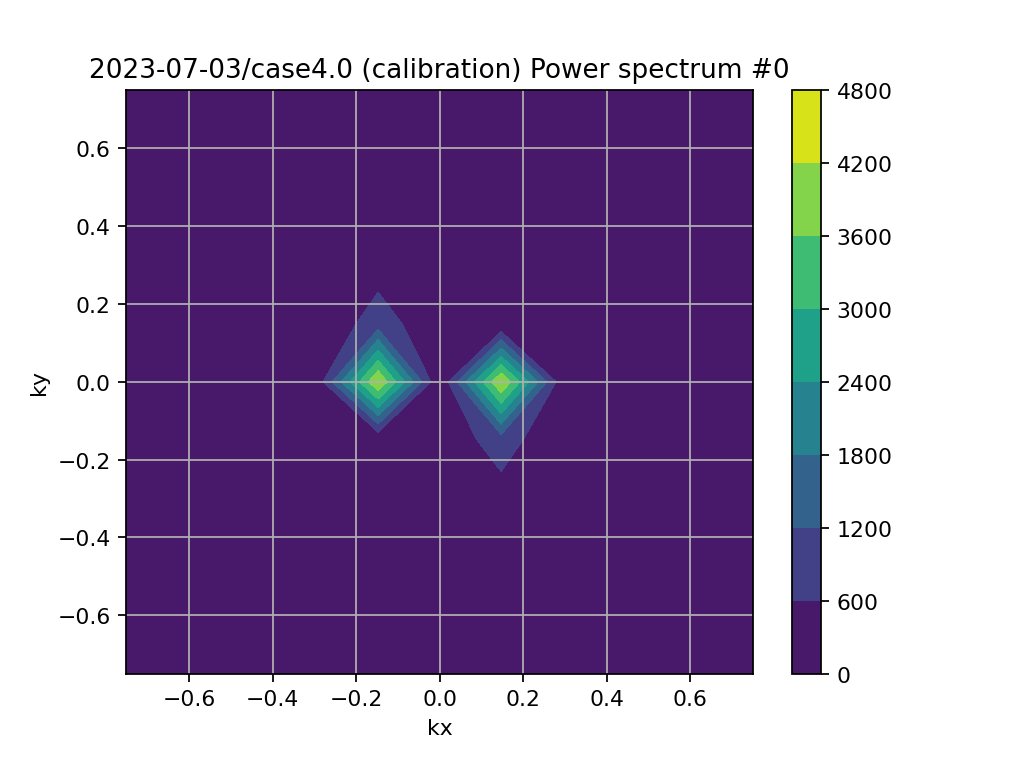

Working on segment  1
(43, 43)


<IPython.core.display.Javascript object>


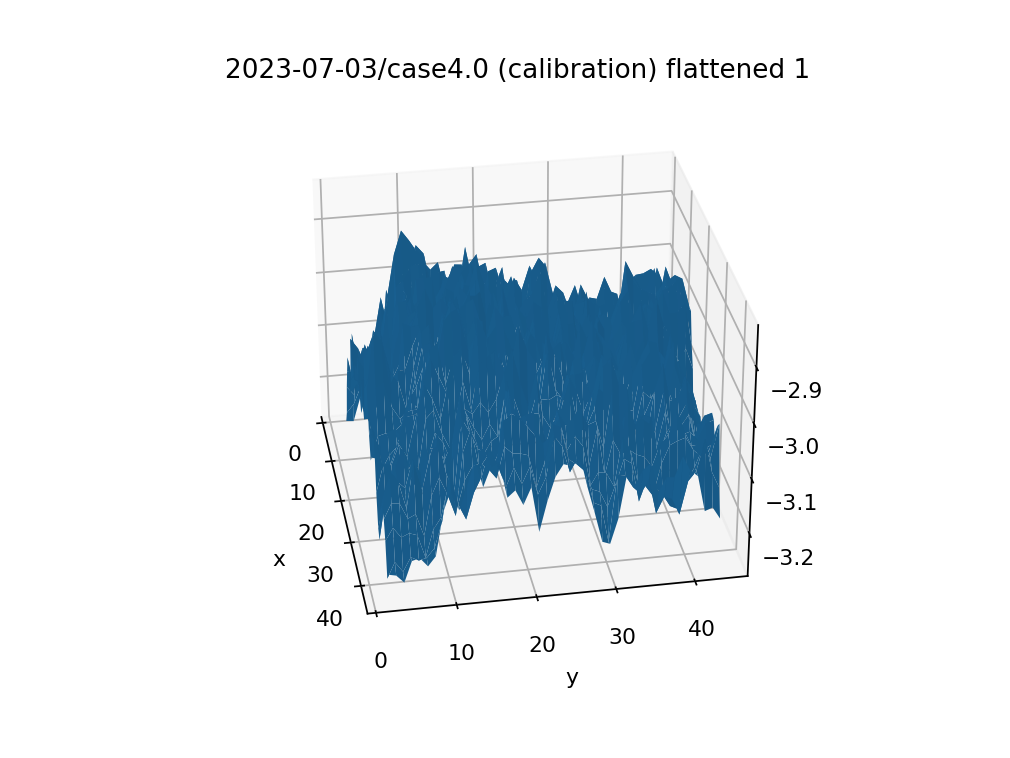

<IPython.core.display.Javascript object>


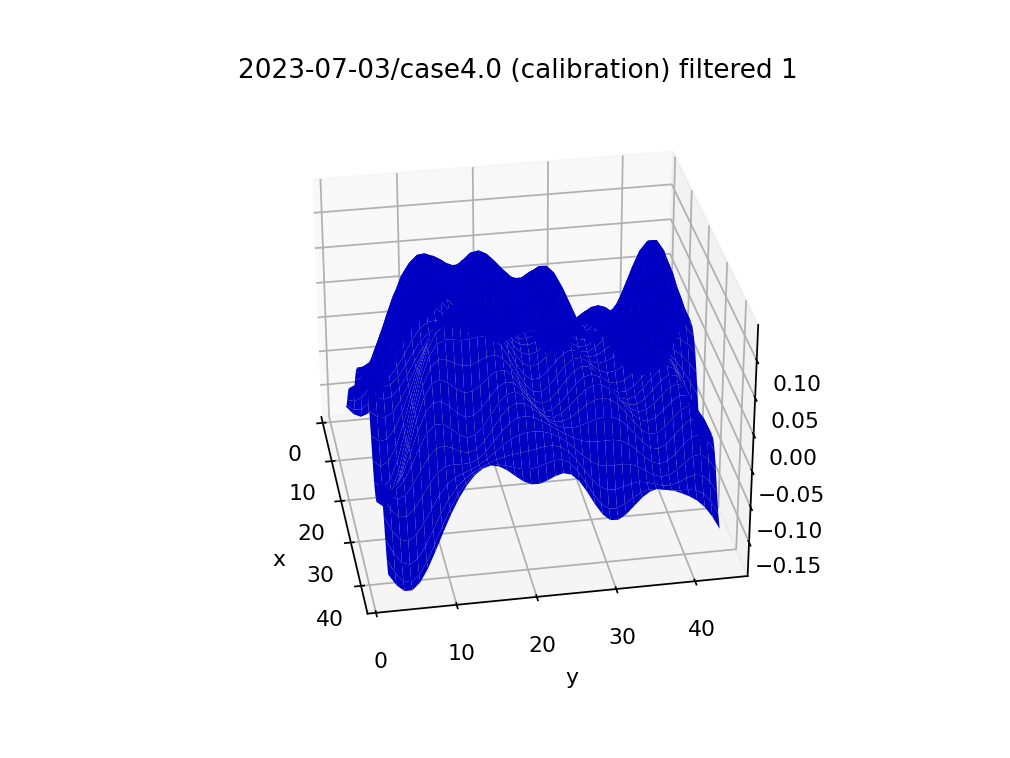

<IPython.core.display.Javascript object>


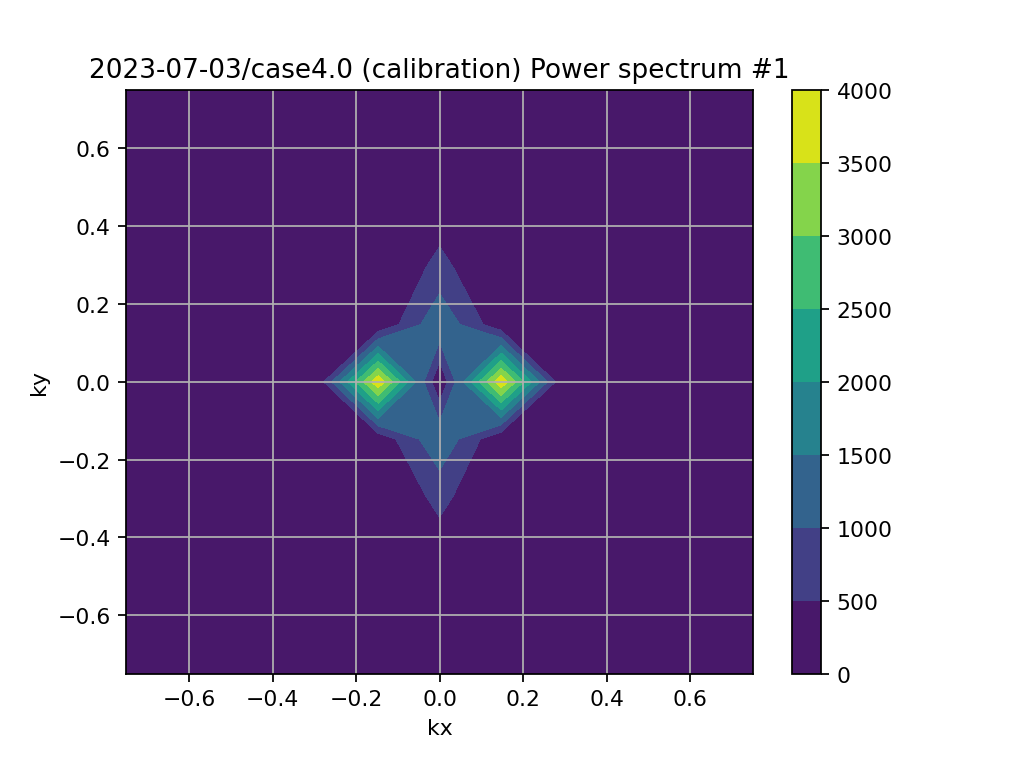

Working on segment  2
(43, 43)


<IPython.core.display.Javascript object>


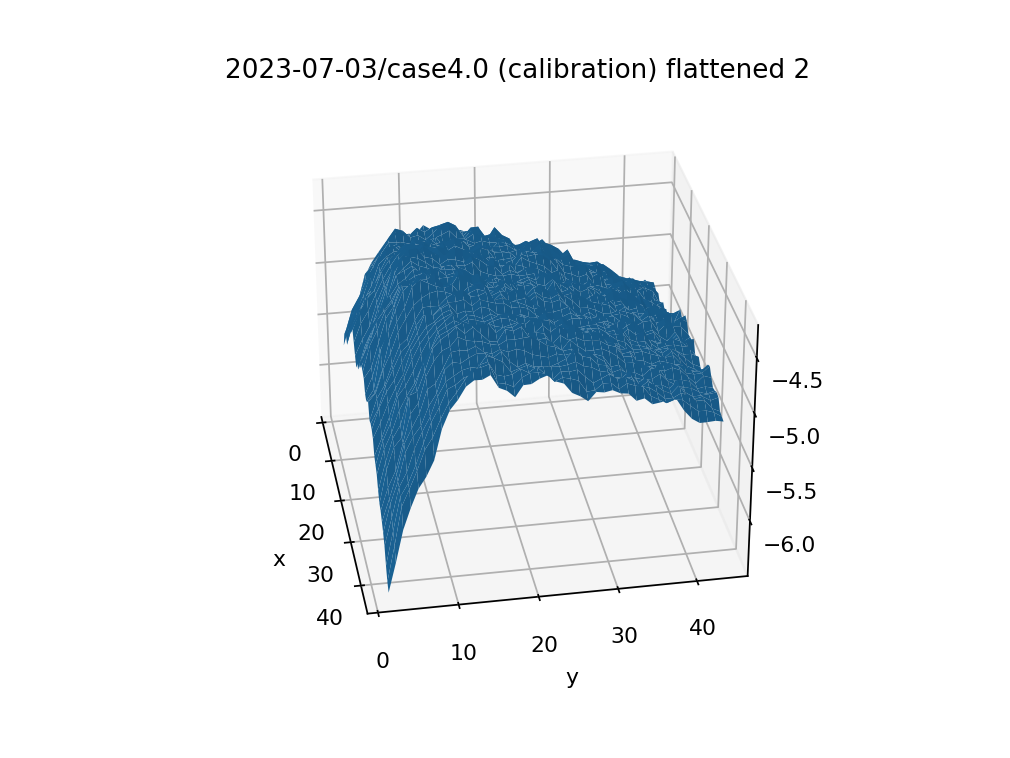

<IPython.core.display.Javascript object>


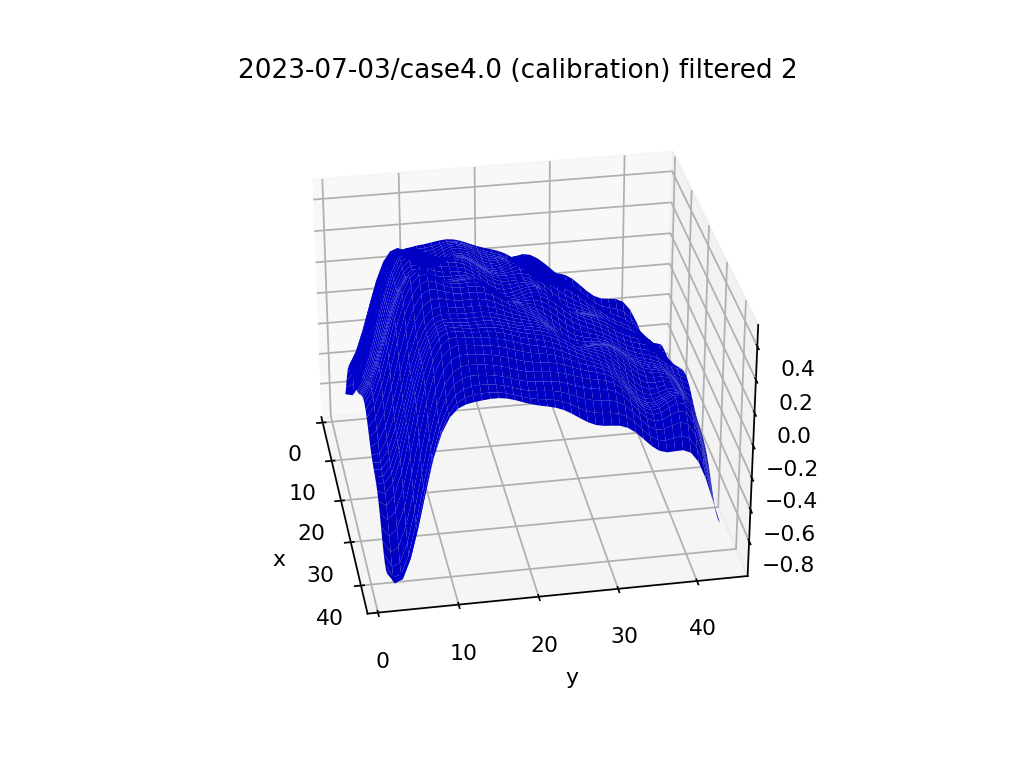

<IPython.core.display.Javascript object>


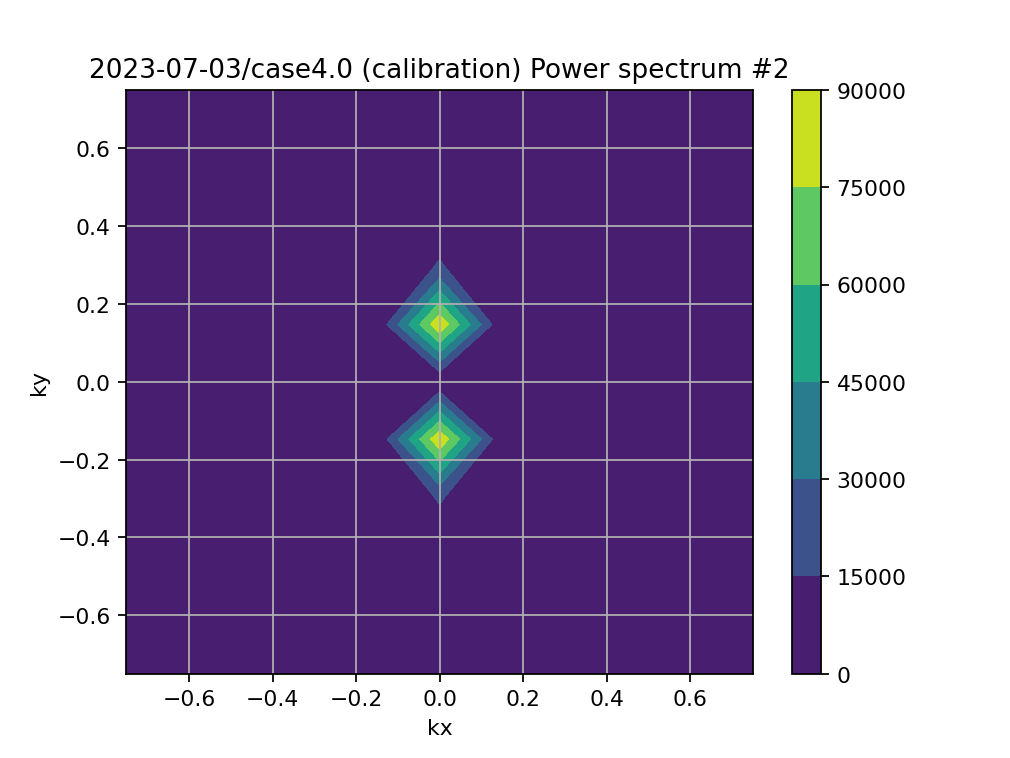

Working on segment  3
(47, 40)


<IPython.core.display.Javascript object>


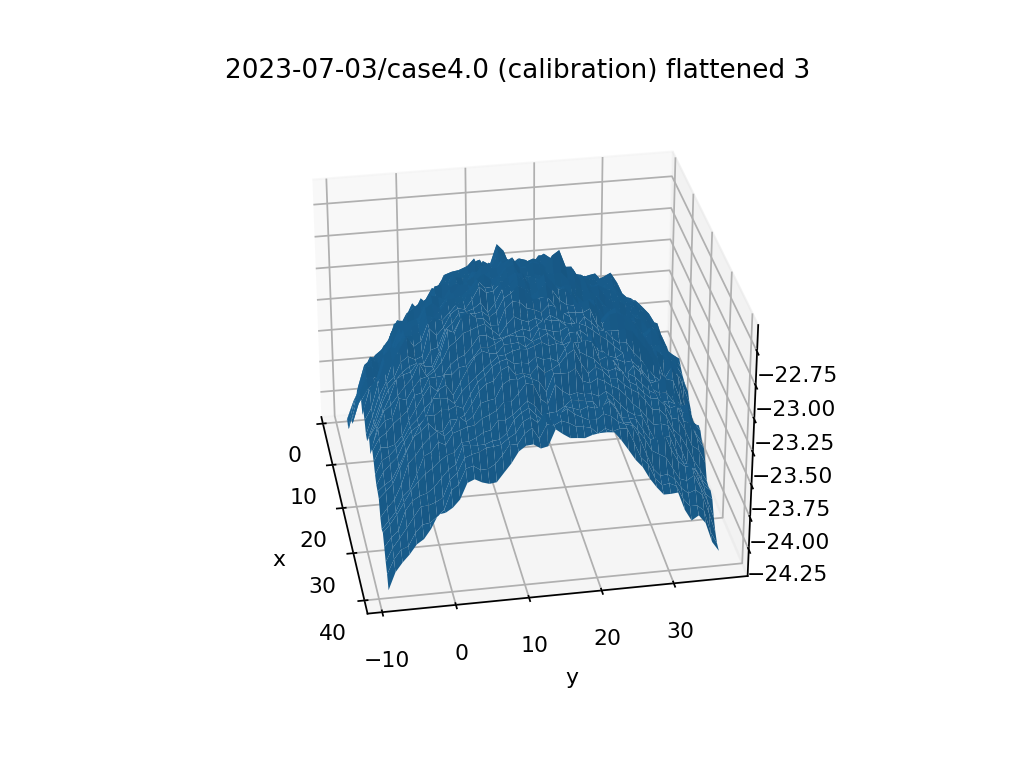

<IPython.core.display.Javascript object>


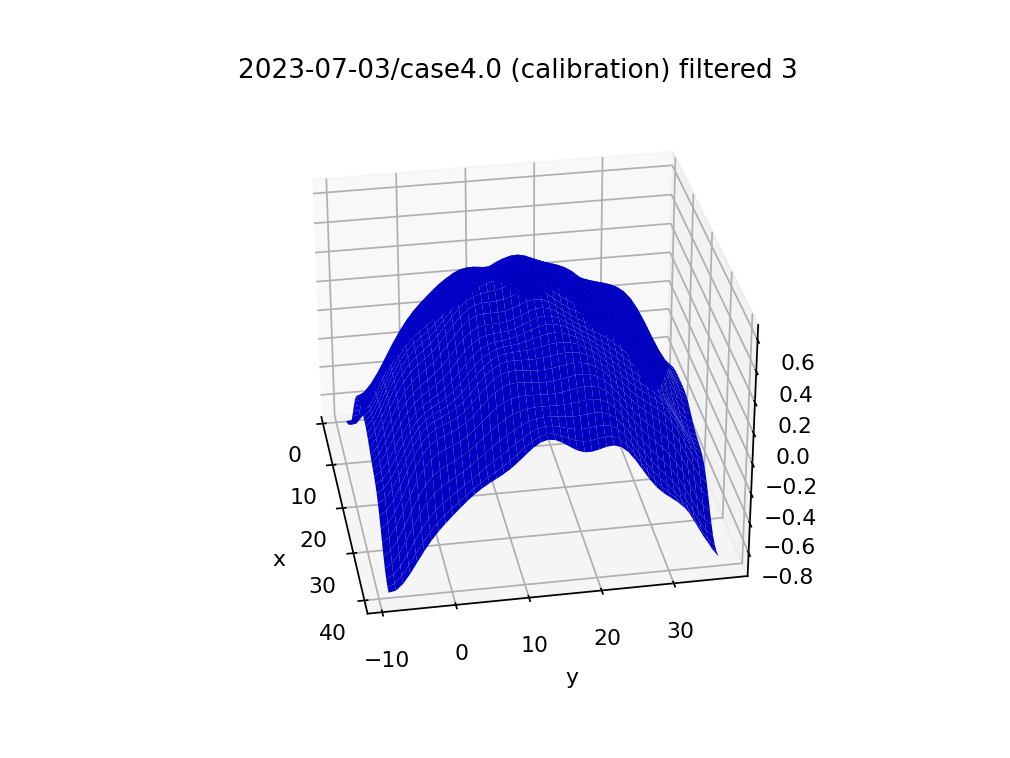

<IPython.core.display.Javascript object>


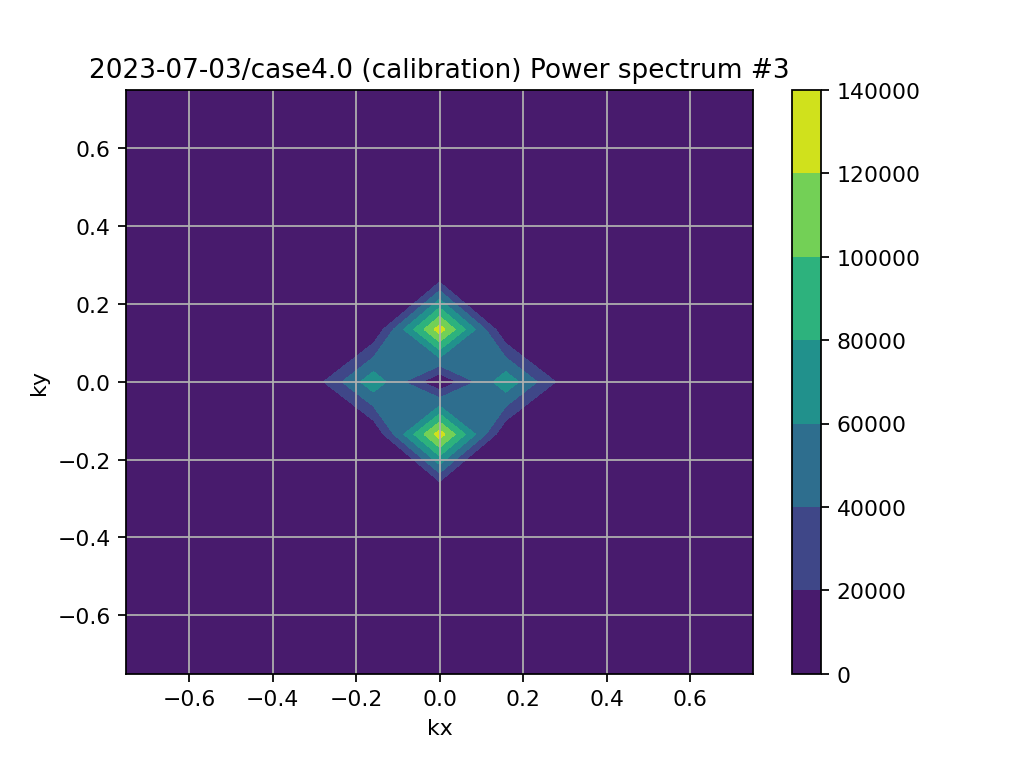

Working on segment  4
(55, 36)


<IPython.core.display.Javascript object>


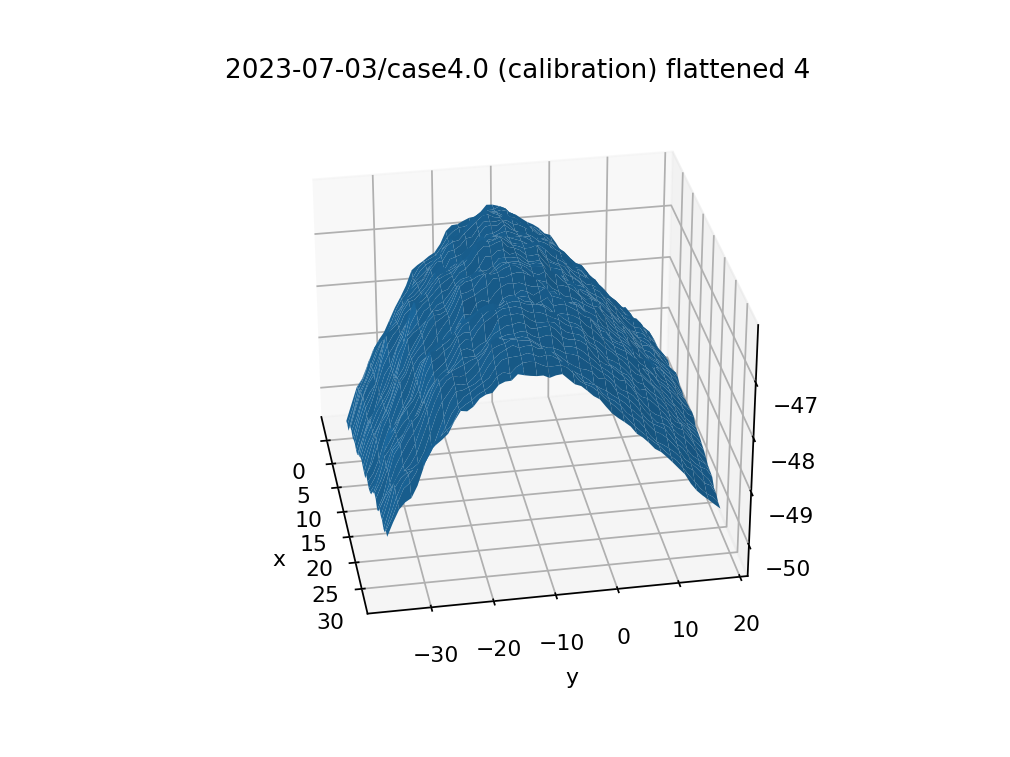

<IPython.core.display.Javascript object>


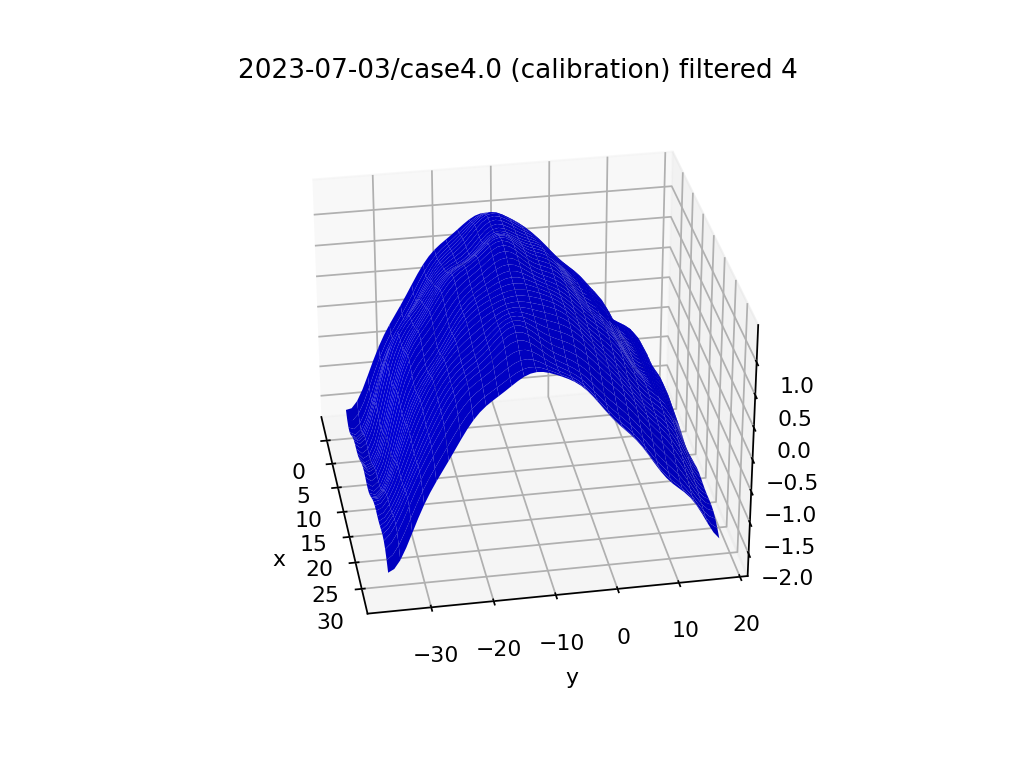

<IPython.core.display.Javascript object>


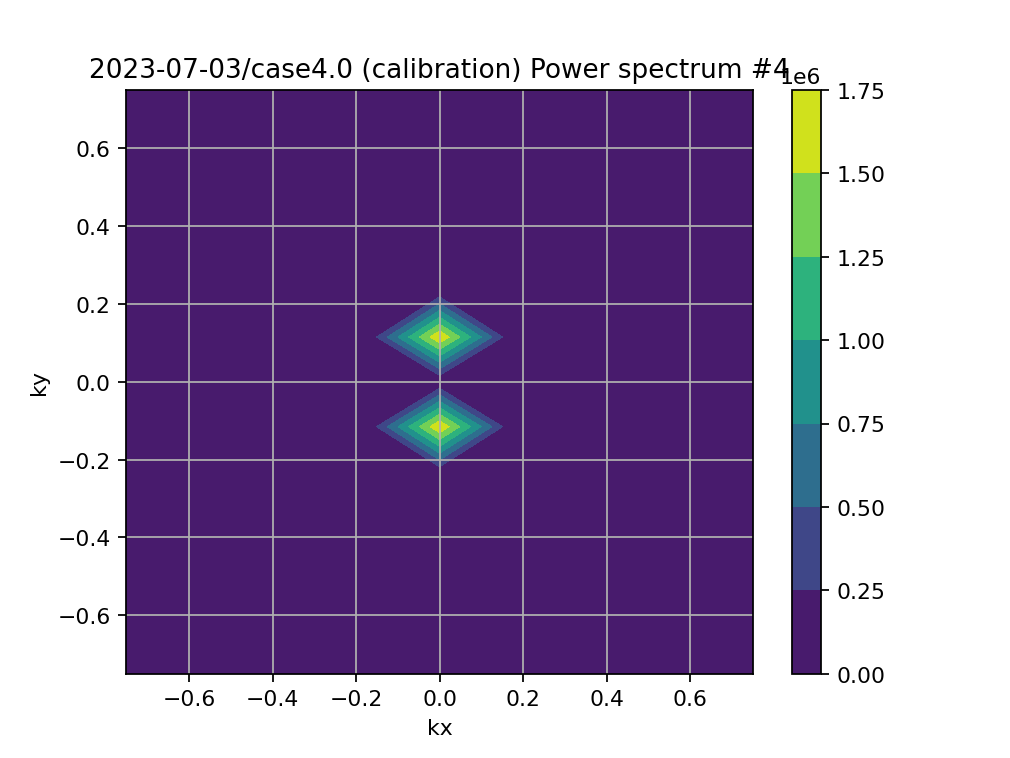

Working on segment  5
(73, 29)


<IPython.core.display.Javascript object>


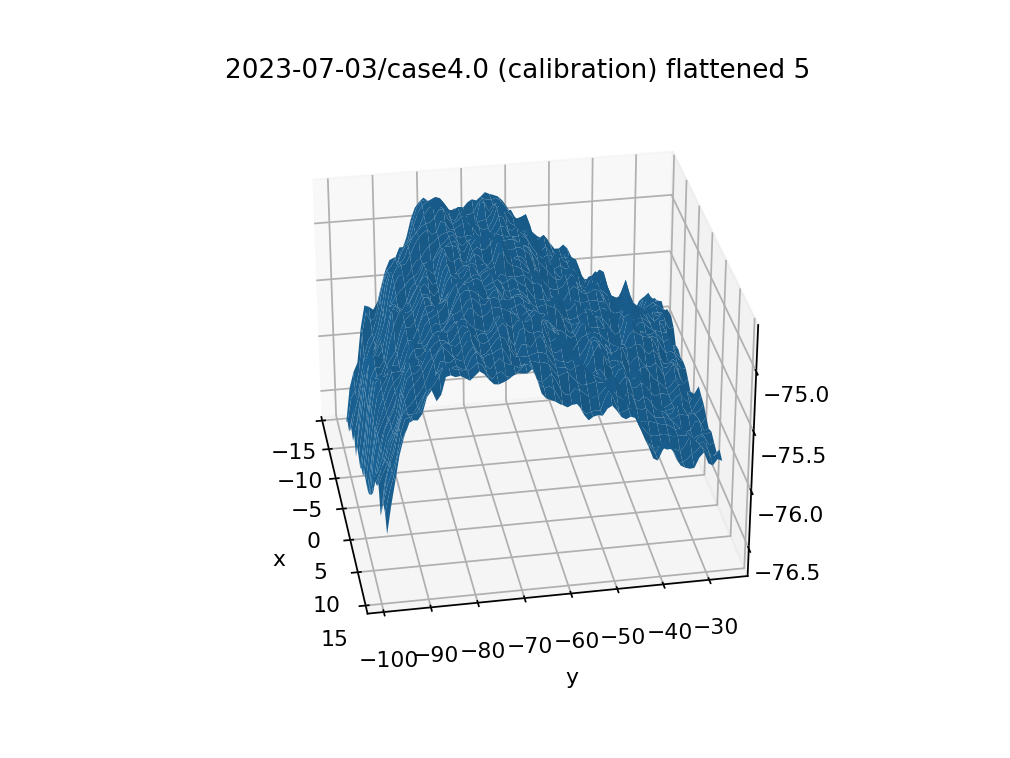

<IPython.core.display.Javascript object>


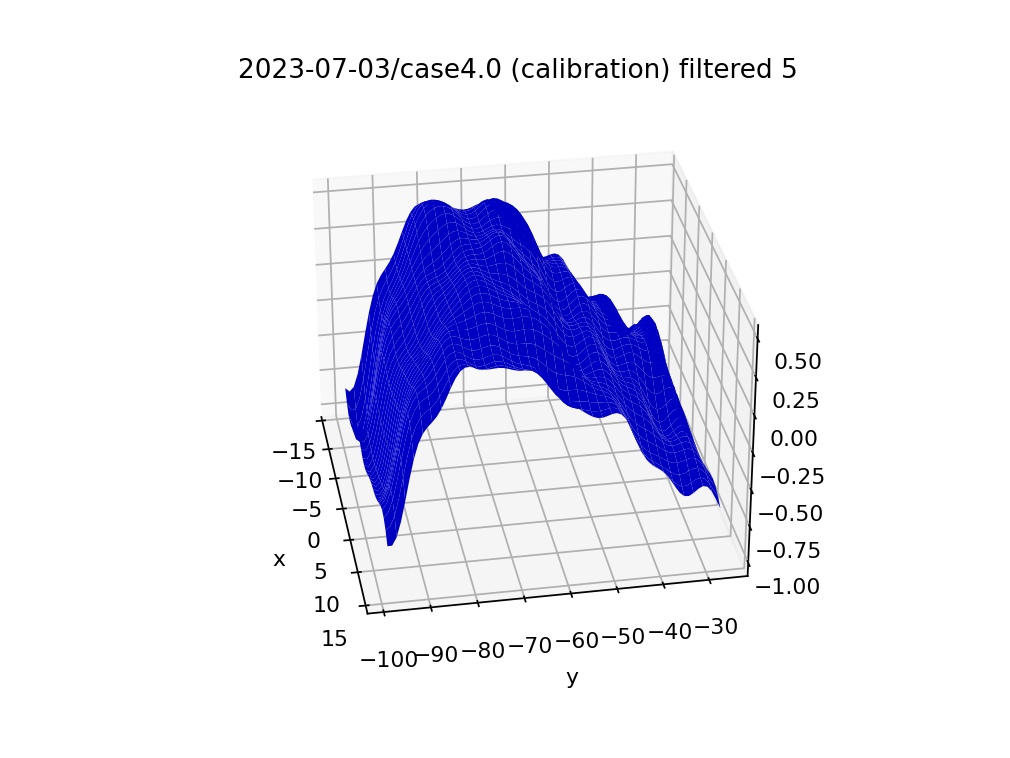

<IPython.core.display.Javascript object>


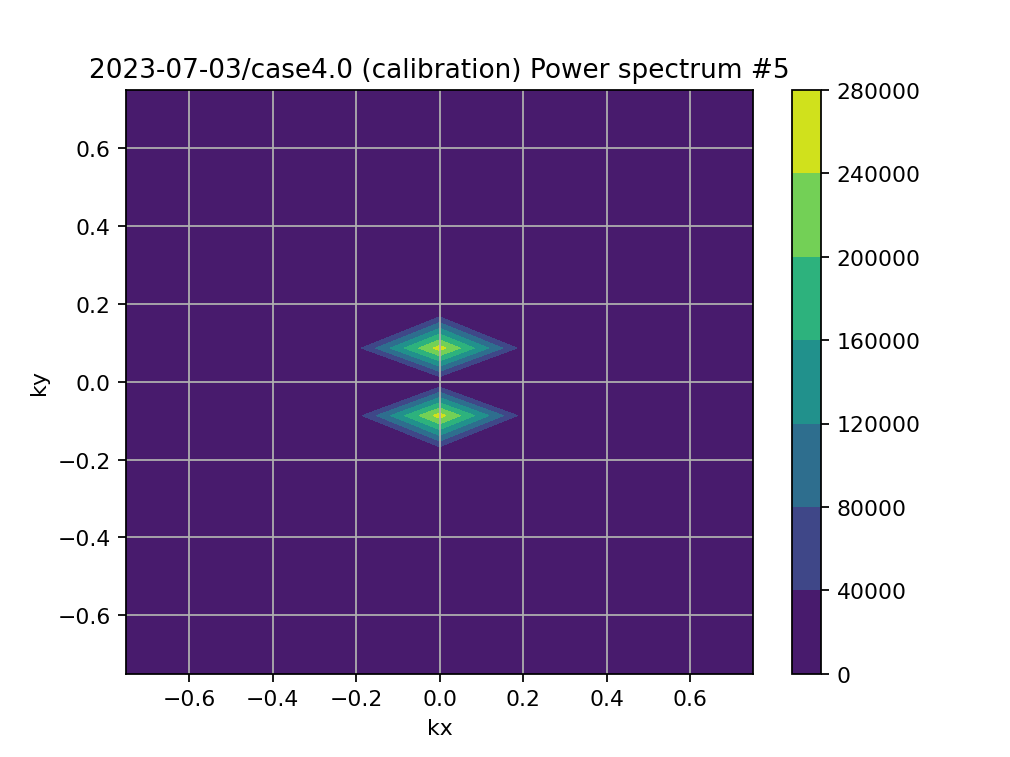

In [81]:
# Fourier transform, filter, and save them
plotthisone = [i for i in range(nsegments)]
vscale = 1
kmax = .75
xseggrid_filtered = []
yseggrid_filtered = []
zseggrid_filtered = []

for i in range(nsegments):
    
    # Reporting
    print('Working on segment ', i)
    
    # Get the next flattened surface
    xgrid = xseggrid[i]
    ygrid = yseggrid[i]
    sollast = zseggrid[i]
    x = xgrid[0,:]; dx = x[1]-x[0]
    y = ygrid[:,0]
    Ny, Nx = np.shape(sollast)

    # Offset to zero
    sollast_offset = np.mean(sollast)
    sollast_atzero = sollast-sollast_offset
    
    # FFT
    solution_filtered = fs.filterseg(kmax,xgrid,ygrid,sollast_atzero)
    sollast_FT_filtered_IFT_real = solution_filtered[0]; print(np.shape(sollast_FT_filtered_IFT_real))
    kxshiftgrid = solution_filtered[1]
    kyshiftgrid = solution_filtered[2]
    sollast_FTshift_square = solution_filtered[3]
    
    # Plot one of them
    if i in plotthisone:
        
        # Graphing the flattened surface as a mesh
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xseggrid[i], yseggrid[i], zseggrid[i])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(case_and_folder + ' flattened '+str(i))
        ax.view_init(30, -10)
                
        # Save an stl file
        #stlfilename = Segmentroot+'_compr_flat'+'_'+str(i)+'_vx'+str(vscale)+'.stl'; print(stlfilename)
        #sls.numpy2stl(np.fliplr(zseggrid[i]), stlfilename, scale=vscale/dx, solid=False)

        # Graphing the filtered flattened surface as a mesh
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xseggrid[i], yseggrid[i], sollast_FT_filtered_IFT_real,color='blue')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(case_and_folder + ' filtered '+str(i))
        ax.view_init(30, -10)
        
#         # Save an stl file
#         stlfilename = Segmentroot+'_compr_flat_filt'+'_'+str(i)+'_vx'+str(vscale)+'.stl'; print(stlfilename)
#         sls.numpy2stl(np.fliplr(sollast_FT_filtered_IFT_real[1:-2,1:-2]), stlfilename, scale=vscale/dx, solid=False)
        
#         # Report something about the heights
#         print ('std dev of height (filtered) = ', np.std(sollast_FT_filtered_IFT_real[1:-2,1:-2]))
#         print ('std dev of height = ', np.std(sollast))
        
        # FT plotting
        plt.figure()
        plt.contourf(kxshiftgrid, kyshiftgrid, sollast_FTshift_square)
        plt.colorbar()
        plt.xlim([-kmax,kmax])
        plt.ylim([-kmax,kmax])
        plt.xlabel('kx')
        plt.ylabel('ky')
        plt.title(case_and_folder + ' Power spectrum #'+str(i))
        plt.grid(True)
        
    # Pack the filtered segment into the big array (but getting rid of the edges)
    xseggrid_filtered.append(xgrid[1:-2,1:-2])
    yseggrid_filtered.append(ygrid[1:-2,1:-2])
    zseggrid_filtered.append(sollast_FT_filtered_IFT_real[1:-2,1:-2])

In [82]:
# Graphing the filtered flattened surface with plotly
print('plotting the last one')
fig = go.Figure(data=go.Surface(x=xseggrid[i],y=yseggrid[i],z=sollast_FT_filtered_IFT_real, colorscale="greys"))
fig.update_layout(scene = dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z'),
            title='test')

plotting the last one


In [83]:
# Do some uniforimization on the unfiltered array
nxmin,nymin = np.shape(xseggrid_filtered[0])
for i in range(len(xseggrid_filtered)):
    nx, ny = np.shape(xseggrid_filtered[i])
    if (nx<nxmin):
        nxmin = nx
    if (ny<nymin):
        nymin = ny
print('minima:', nxmin,nymin)
xseggrid_filtered_uni = []
yseggrid_filtered_uni = []
zseggrid_filtered_uni = []
for i in range(len(xseggrid_filtered)):
    xseggrid_filtered_uni.append(xseggrid_filtered[i][0:nxmin,0:nymin])
    yseggrid_filtered_uni.append(yseggrid_filtered[i][0:nxmin,0:nymin])
    zseggrid_filtered_uni.append(zseggrid_filtered[i][0:nxmin,0:nymin])

# Do some uniformization on the unfiltered array
nxmin,nymin = np.shape(xseggrid[0])
for i in range(len(xseggrid)):
    nx, ny = np.shape(xseggrid[i])
    if (nx<nxmin):
        nxmin = nx
    if (ny<nymin):
        nymin = ny
print('minima:', nxmin,nymin)
xseggrid_uni = []
yseggrid_uni = []
zseggrid_uni = []
for i in range(len(xseggrid_filtered)):
    xseggrid_uni.append(xseggrid[i][0:nxmin,0:nymin])
    yseggrid_uni.append(yseggrid[i][0:nxmin,0:nymin])
    zseggrid_uni.append(zseggrid[i][0:nxmin,0:nymin])

minima: 40 26
minima: 43 29


In [84]:
# Save the flattened segments
np.savez_compressed(Originalfilename, \
                    xgridtot=surf_xseggrid, \
                    ygridtot=surf_yseggrid, \
                    zgridtot=surf_zseggrid)

np.savez_compressed(Flattenedfilename, \
                    xgridtot=xseggrid_uni, \
                    ygridtot=yseggrid_uni, \
                    zgridtot=zseggrid_uni)

np.savez_compressed(Filteredfilename, \
                    xgridtot=xseggrid_filtered_uni, \
                    ygridtot=yseggrid_filtered_uni, \
                    zgridtot=zseggrid_filtered_uni)

In [85]:
# See if we can get some angles
ims.extractdots(npzfile,dx,dy)

0 1 0.9997524302280314 1.274956592205198
0 2 0.9973178409382157 4.1973676726727485
0 3 0.9000708254496025 25.83262151197673
0 4 0.7658121405437219 40.02070216066405
0 5 0.5797571331431436 54.566537508284334
1 2 0.998696054649246 2.926270896287314
1 3 0.9095400255224011 24.558136337021324
1 4 0.7799276996960609 38.74604386862596
1 5 0.597720387059196 53.29319373632101
2 3 0.929526270554207 21.63891074066311
2 4 0.8106502733271446 35.84048638456438
2 5 0.6374454165726224 50.39840667151011
3 4 0.9691749350009004 14.263023103948282
3 5 0.8758244281967077 28.85730291433744
4 5 0.9677333764543015 14.594496928116714


<IPython.core.display.Javascript object>


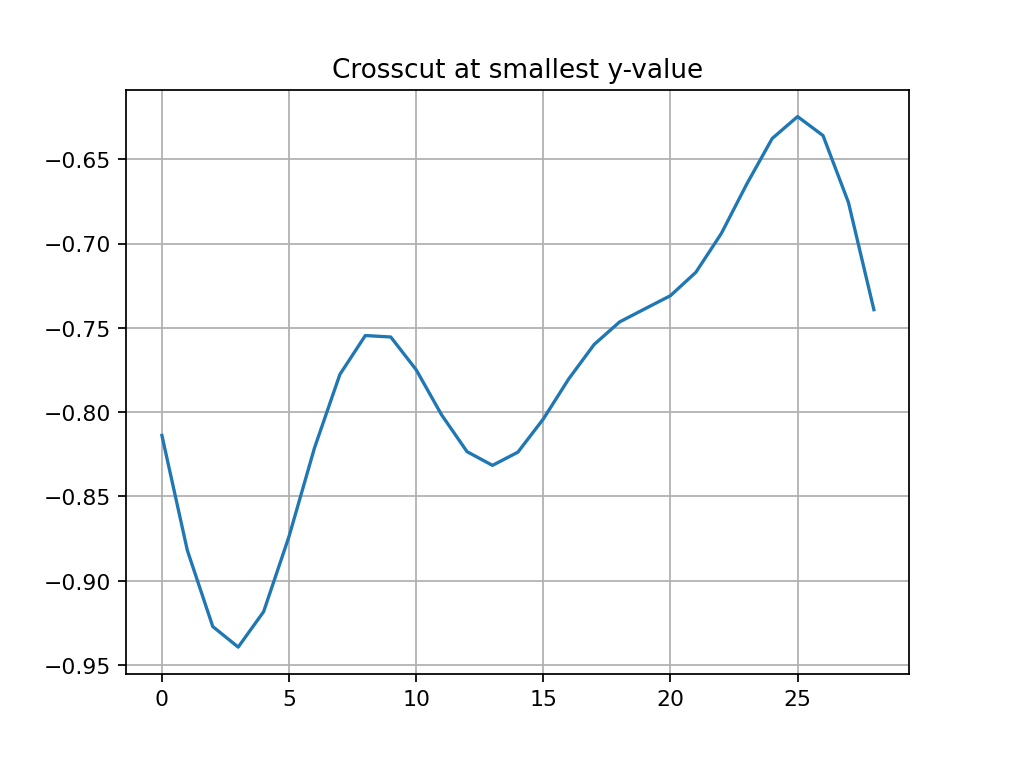

In [86]:
fig = plt.figure()

# Add an axes to the figure
ax = fig.add_subplot(1, 1, 1)

# Plot data
ax.plot(np.arange(np.shape(sollast_FT_filtered_IFT_real)[1]), sollast_FT_filtered_IFT_real[0])

# Set labels and title if desired
title = "Crosscut at smallest y-value"
ax.set_title(title)
ax.grid()

# Display the plot
plt.show()

# Save Data
plt.savefig(title+".png")

In [87]:
# The rise and run below are extracted visually from the cross cut
angle = np.arctan2(.3,30)*180/np.pi
print(angle)

0.5729386976834859
